/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Exponential Smoothing with Trend:
Alpha (level): 0.9950
Gamma (trend): 0.0237

Exponential Smoothing with Trend Results:
RMSE: 5979.85
MAE: 5060.17
MAPE: 4.19


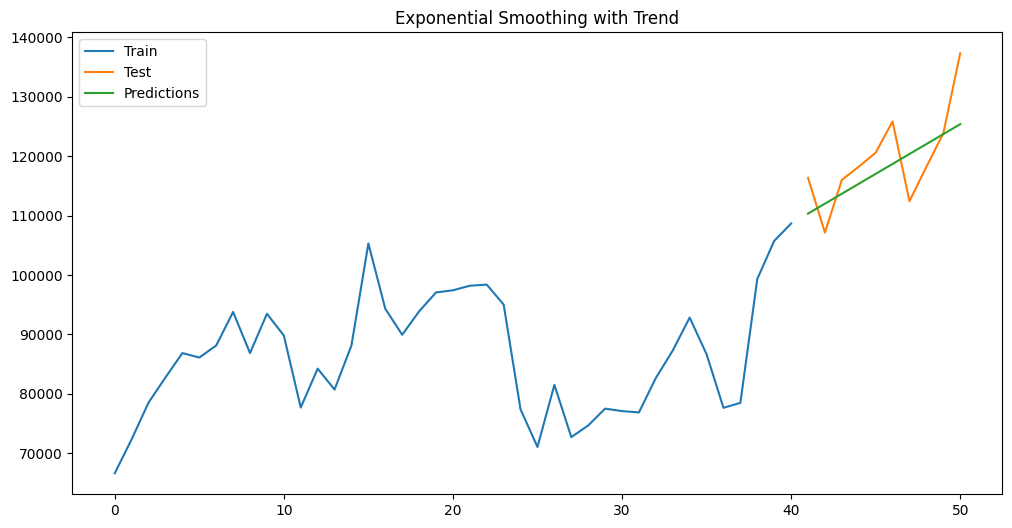

<ipython-input-5-a686abff3121>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate(y_true, y_pred):
    not_nan_indices = ~np.isnan(y_pred)
    y_true_filtered = y_true[not_nan_indices]
    y_pred_filtered = y_pred[not_nan_indices]
    
    rmse = np.sqrt(mean_squared_error(y_true_filtered, y_pred_filtered))
    mae = mean_absolute_error(y_true_filtered, y_pred_filtered)
    mape_val = mape(y_true_filtered, y_pred_filtered)
    r2 = r2_score(y_true_filtered, y_pred_filtered)
    
    return rmse, mae, mape_val, r2


def plot_data(train, test, predictions, title):
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(test.index, predictions, label='Predictions')
    plt.title(title)
    plt.legend()
    plt.show()


# Load the data
data = pd.read_csv("FULL_DATASET_.csv")

# Split the data into training and testing data
# Used 80% training and 20% testing for analysis
train = data.loc[data["Period"] < 41, "Services"]
test = data.loc[data["Period"] >= 41, "Services"]

#initialize exponential smoothing with level and trend components model
ets_t = ExponentialSmoothing(train, trend='add').fit()


# Print optimized parameters for the model
# Trend component prints as a gamma value but I refer to it as beta in my presentation and paper
print("Exponential Smoothing with Trend:")
print(f"Alpha (level): {ets_t.params['smoothing_level']:.4f}")
print(f"Gamma (trend): {ets_t.params['smoothing_trend']:.4f}\n")

# Make predictions
ets_t_pred = ets_t.forecast(len(test))

# Evaluate and print errors
models = {
    'Exponential Smoothing with Trend': ets_t_pred,
}

for model_name, predictions in models.items():
    rmse, mae, mape_val, r2 = evaluate(test, predictions)
    print(f"{model_name} Results:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape_val:.2f}")

    plot_data(train, test, predictions, model_name)

# Initialize an empty DataFrame to store the error results
results_df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE'])

# Iterate through each model, evaluate it, and store the results in the DataFrame
for model_name, predictions in models.items():
    rmse, mae, mape_val, r2 = evaluate(test, predictions)
    results_df = results_df.append({'Model': model_name,
                                     'RMSE': rmse,
                                     'MAE': mae,
                                     'MAPE': mape_val}, ignore_index=True)

# Save the results DataFrame to an Excel file
results_df.to_excel('time_series_model_results_FULL_DATASET_.xlsx', index=False)
